In [1]:
import magcolloids as mgc
import os
import sys
import numpy as np
import pandas as pd
from multiprocessing import Pool
import tqdm.auto as tqdm

sys.path.insert(0, '../icenumerics')

import icenumerics as ice
import matplotlib.pyplot as plt

# Checking magnetic field applied

In this script, I will check the applied magnetic field in the Shakti experiment to figure out what is happening. 

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-11.0"

In [6]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory,
                                         "shakti_10x10_25mT-TEST.lammpstrj"), output = ["x","y","z","mux","muy","muz"])    
bnd = load_obj.get_bounds()
trj = load_obj.read_trj()

In [8]:
#col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])

In [25]:
particles = trj.query('type == 1')
particles

type            x           y    z  mux  muy       muz
frame  id                                                          
0      1        1     0.000000  -19.192400  0.0  0.0  0.0  0.000000
       2        1    -9.192390   28.384800  0.0  0.0  0.0  0.000000
       3        1     9.192390   28.384800  0.0  0.0  0.0  0.000000
       4        1   -19.192400  -28.384800  0.0  0.0  0.0  0.000000
       5        1     9.192390  -28.384800  0.0  0.0  0.0  0.000000
...           ...          ...         ...  ...  ...  ...       ...
250000 1996     1  1078.550049  954.841980  0.0  0.0  0.0  0.000174
       1997     1  1069.430054  993.367981  0.0  0.0  0.0  0.000174
       1998     1  1088.719971  993.403992  0.0  0.0  0.0  0.000174
       1999     1  1069.780029  936.934021  0.0  0.0  0.0  0.000174
       2000     1  1097.859985  936.760986  0.0  0.0  0.0  0.000174

[5002000 rows x 7 columns]

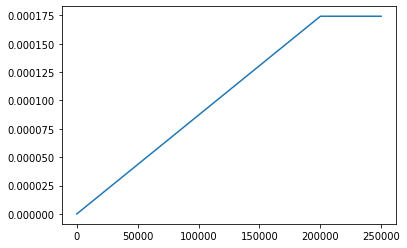

In [12]:
plt.plot(particles.index.get_level_values('frame'), particles['muz'])

It Seems OK!

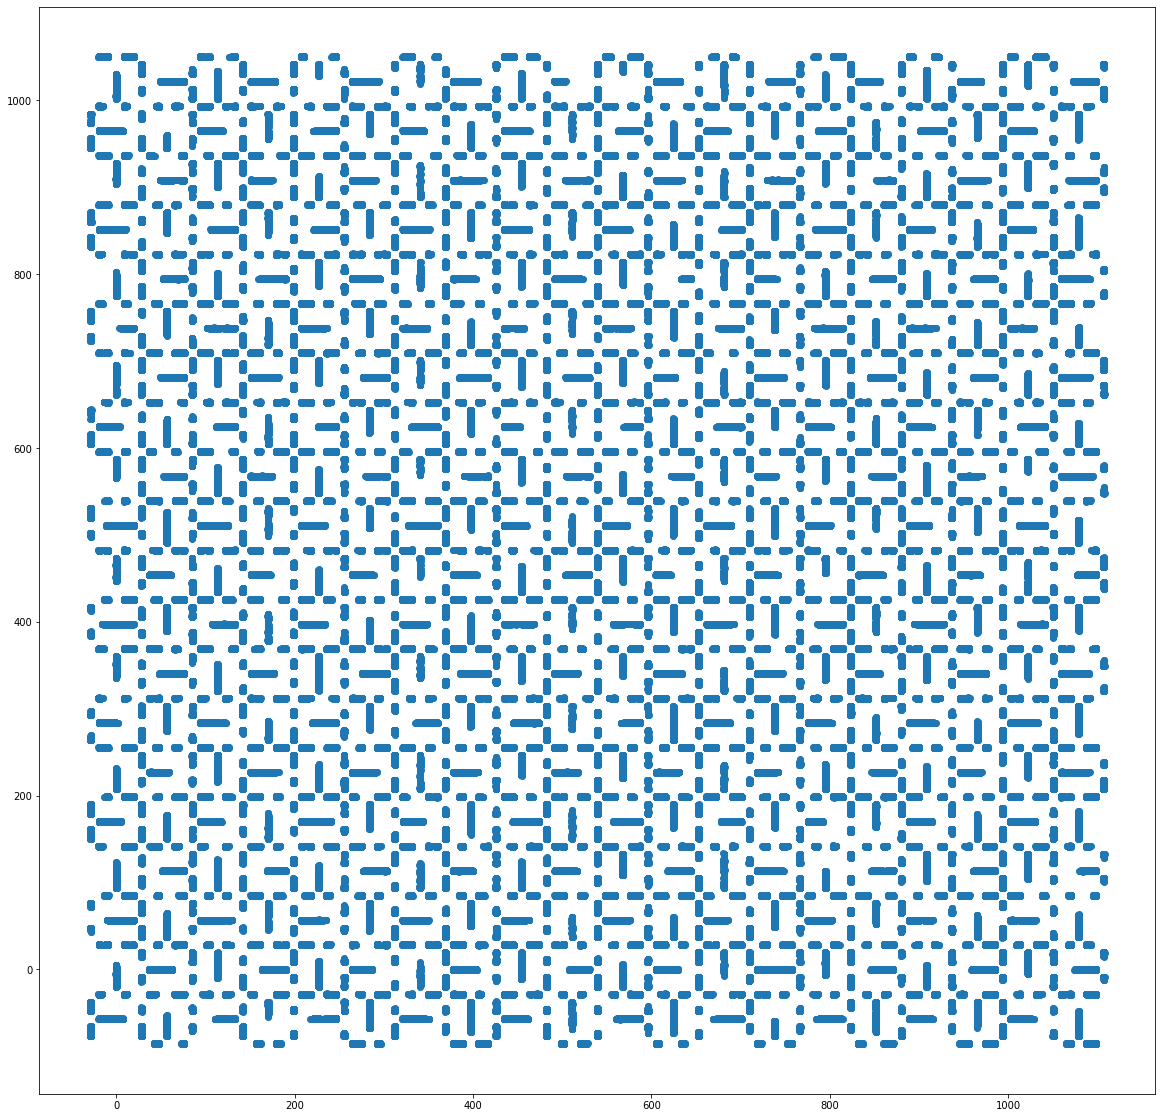

In [24]:
fig, (ax1) = plt.subplots(1,1,figsize = (20,20))
plt.plot(particles.x, particles.y, 'o')